In [1]:
%matplotlib inline

The imaging facility at Stanford is equipped with a TwinCam system that allows working with 2 cameras in parallel and then imaging 2 colors at the frame rate of the cameras. However, the main problem with this system is that the alignment of the cameras is almost never perfect and takes a lot of time. In order to go around that problem I wrote ImageAlignement that allow realigning these images. 

It works with 2 colors images, time laps, z stack or everything combine and it since I’m using the python package python-bioformats it can open almost any format.

This module is mostly base on the image alignment module (ECC) in OpenCV3. For the image alignment we usually start with images of the same beads in 2 different colors.

Here is an example of these beads


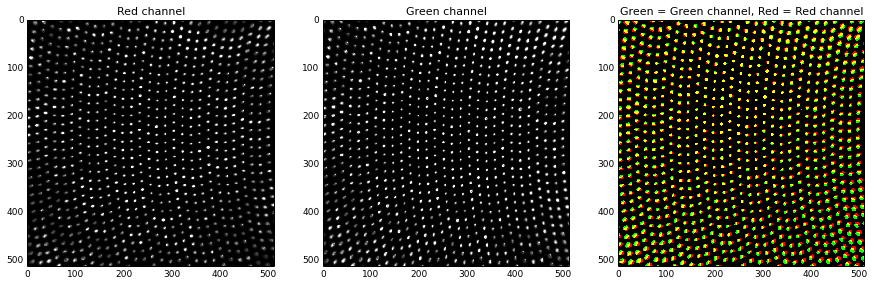

In [2]:
import open_image_alignment as oia
import ImageAlignment as ia

ImageBeads = "/.../.../beads.nd2"
oia.overlay_channels(ImageBeads)

We can see that also they are pretty well align in the middle of the field, it's not the case at the edge. To realign perfectly the images we will be using a "motion model". 
4 different image alignment algorithms aim to estimate the parameters of these motion models in OpenCV, Translation, Euclidian, Affine and Homography.  Once these parameters are known, warping one image so that it aligns with the other is straightforward.

Here we will be using the Affine model to determine the matrix that we can apply to the image we would like to align.

In [3]:
matrix = ia.define_matrix(ImageBeads)
print matrix

[[ 0.99881166 -0.01039765  1.97231293]
 [ 0.01077399  1.0021981  -2.82114697]]


I can now apply this matrix to the beads:

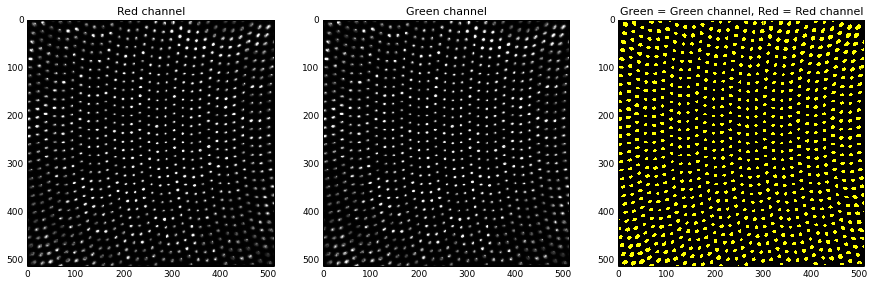

In [4]:
image_aligned = ia.align(ImageBeads, matrix)
oia.overlay_channels(image_aligned)

It seems to be working well, let's try it with our actual images:

Before alignment:

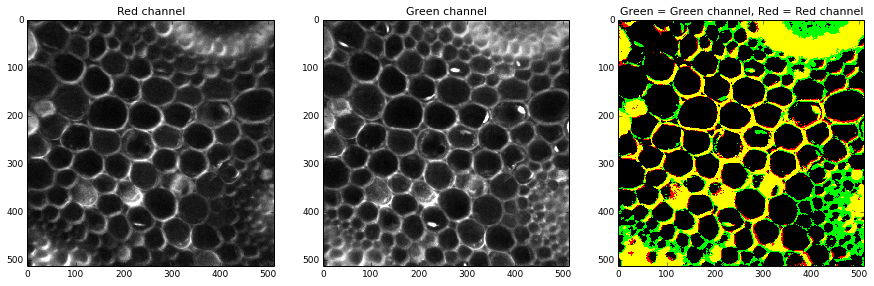

In [6]:
imageTOalign = "/.../.../.../Time_lapse.nd2"
oia.overlay_channels(imageTOalign, scale_max=18000)

After Alignment:

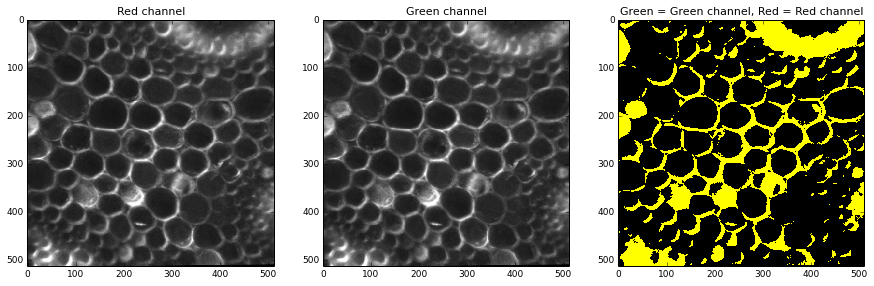

In [8]:
image_aligned = ia.align(imageTOalign, matrix)
oia.overlay_channels(image_aligned, scale_max=18000)

I wrote a function (ia.imsave_al()) which is using the tifffile module to save the new aligned images into a TIF file (keeping the same filename). The TIF file will keep some of the metadata (dimension, pixel size, z steps and frame rate)